In [1]:
import pandas as pd

In [2]:
# Citation:
# International Monetary Fund, Global price of Palm Oil [PPOILUSDM], retrieved from FRED, Federal Reserve Bank of St. 
# Louis; https://fred.stlouisfed.org/series/PPOILUSDM, November 9, 2020.
    
# Global Palm Oil Price by Day
# U.S. Price is Dollars per Metric Ton
palmoil_by_day = pd.read_csv("data/PPOILUSDM.csv")
palmoil_by_day = palmoil_by_day.set_index("DATE")
palmoil_by_day

,PPOILUSDM
DATE,
1990-01-01,230.555951
1990-02-01,223.945027
1990-03-01,236.340509
1990-04-01,220.639566
1990-05-01,232.208681
...,...
2020-05-01,498.482165
2020-06-01,573.223587
2020-07-01,610.495598


In [3]:
# Citation:
# International Monetary Fund, Global price of Rubber [PRUBBUSDM], retrieved from FRED, Federal Reserve Bank of St. 
# Louis; https://fred.stlouisfed.org/series/PRUBBUSDM, November 8, 2020.
    
# Global Palm Oil Price by Day
# U.S. Price is cents per pound
rubber_by_day = pd.read_csv("data/PRUBBUSDM.csv")
rubber_by_day = rubber_by_day.set_index("DATE")
rubber_by_day

,PRUBBUSDM
DATE,
1990-01-01,37.730000
1990-02-01,38.680000
1990-03-01,37.580002
1990-04-01,38.009998
1990-05-01,38.750000
...,...
2020-05-01,61.373641
2020-06-01,64.785438
2020-07-01,67.984937


In [4]:
# Convert cents per pound to USD per metric ton.
# 1 metric ton = 2,204.623 lb
rubber_converted = pd.DataFrame(rubber_by_day["PRUBBUSDM"]*22.04623)
rubber_converted

,PRUBBUSDM
DATE,
1990-01-01,831.804248
1990-02-01,852.748183
1990-03-01,828.497364
1990-04-01,837.977165
1990-05-01,854.291413
...,...
2020-05-01,1353.057397
2020-06-01,1428.274671
2020-07-01,1498.811563


In [5]:
# Export to CSV
rubber_converted.to_csv("data/rubber_USD_metric_ton.csv")

## Read data from Postgres into Pandas

In [6]:
# Import additional dependencies
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sqlalchemy import create_engine

from config import login

In [7]:
# Connect to DB
db_url = 'postgresql://' + login + '@localhost:5432/commodities_db'
engine = create_engine(db_url)
connection = engine.connect()

In [8]:
# Get palm oil and rubber data from DB
select_from_db = 'SELECT po.date, po.usd_per_metric_ton AS "Palm Oil USD per Metric Ton", r.usd_per_metric_ton AS "Rubber USD per Metric Ton"\
FROM palm_oil po \
JOIN rubber r \
ON r.date = po.date;'
palmoil_rubber = pd.read_sql(select_from_db, connection)
palmoil_rubber = palmoil_rubber.set_index("date")
palmoil_rubber.head()

,Palm Oil USD per Metric Ton,Rubber USD per Metric Ton
date,,
1990-01-01,230.555951,831.804248
1990-02-01,223.945027,852.748183
1990-03-01,236.340509,828.497364
1990-04-01,220.639566,837.977165
1990-05-01,232.208681,854.291413


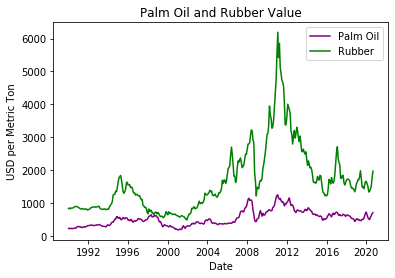

In [10]:
# Plot line graph with both palm oil and rubber data on the same chart

ax1 = palmoil_rubber.plot(y="Palm Oil USD per Metric Ton", kind="line", color="purple", label="Palm Oil", title="Palm Oil and Rubber Value")
palmoil_rubber.plot(y="Rubber USD per Metric Ton", kind="line", color="green", label="Rubber", ax=ax1)


# Plot labels
ax1.set_xlabel("Date")
ax1.set_ylabel("USD per Metric Ton")

# Plot the legend
ax1.legend(loc="best")

# Display graph
plt.savefig("../../images/palmoil_rubber.png")
plt.show()
